## Exercises

#### Create a file named seaborn_exercises.py or seaborn_exercises.ipynb for this exercise.

#### Use the iris database to answer the following questions:
- What does the distribution of petal lengths look like?
- Is there a correlation between petal length and petal width?
- Would it be reasonable to predict species based on sepal width and sepal length?
- Which features would be best used to predict species?

In [2]:
# imports:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
from matplotlib import figure

import seaborn as sns

In [3]:
from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/iris_db'

In [4]:
def get_db_url(db, host = host, user = user, password = password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}' 

In [5]:
sql_query = 'SELECT * FROM measurements AS m JOIN '

In [6]:
iris = pd.read_sql(sql_query, get_db_url('iris_db'))
iris

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
5,6,5.4,3.9,1.7,0.4,1
6,7,4.6,3.4,1.4,0.3,1
7,8,5.0,3.4,1.5,0.2,1
8,9,4.4,2.9,1.4,0.2,1
9,10,4.9,3.1,1.5,0.1,1


In [69]:
iris.dtypes

measurement_id      int64
sepal_length      float64
sepal_width       float64
petal_length      float64
petal_width       float64
species_id          int64
dtype: object

In [70]:
iris.shape

(150, 6)

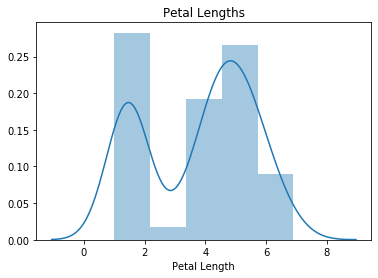

In [71]:
# What does the distribution of petal lengths look like?

# Use a dist chart:

sns.distplot(iris.petal_length)

plt.title("Petal Lengths")
plt.xlabel("Petal Length")
plt.ylabel("")
# I'm actually not sure what the y axis is returning.
plt.show()

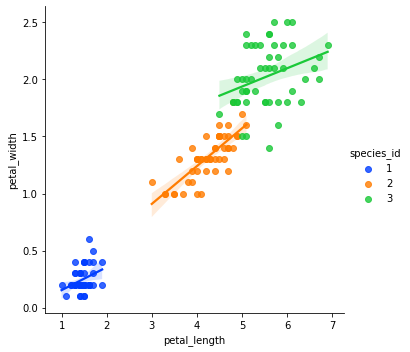

In [163]:
# Is there a correlation between petal length and petal width?

# Best to use a lmplot in this case I'd think.

sns.lmplot(x='petal_length', y='petal_width', hue ='species_id', data=iris)
plt.show()

# There appears to be a fairly strong correlation between petal length and petal width, according to the data available here.

In [79]:
# Creating new dataframe with both tables joined:

# species_query = 'SELECT * FROM species'

In [80]:
# # Then new variable for this table:

# iris_s = iris = pd.read_sql(species_query, get_db_url('iris_db'))
# iris_s

In [81]:
# Merging the tables:

# pd.merge(iris, iris_s, left_on = 'species_id', right_on = 'species_id', how = 'inner')

In [82]:
# iris_all_query = SELECT * FROM measurements as m 

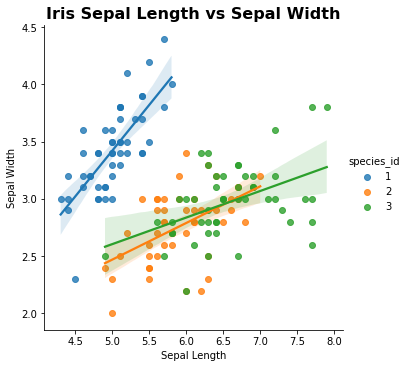

In [81]:
# Would it be reasonable to predict species based on sepal width and sepal length?

sns.lmplot(x='sepal_length', y='sepal_width', data=iris, hue='species_id')
plt.title("Iris Sepal Length vs Sepal Width", fontsize = 16, fontweight = 'bold')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

# No, it does not appear reasonable to assume the species based on simply the sepal length and width.

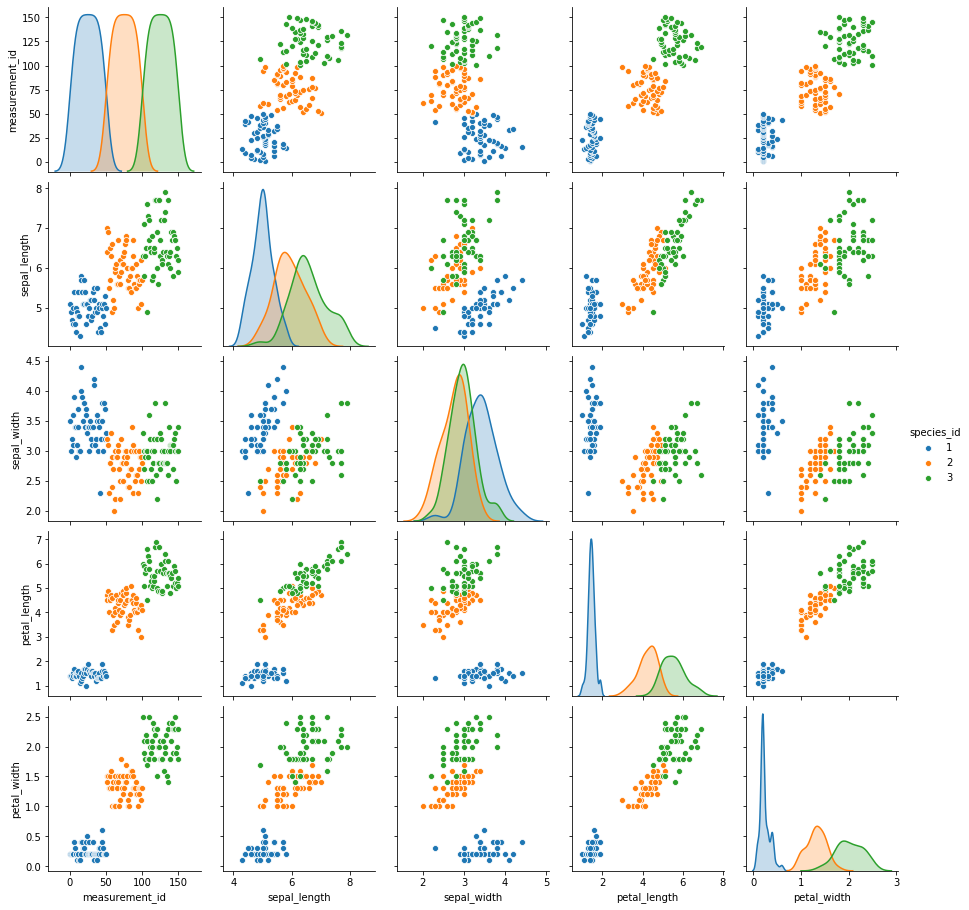

In [88]:
# Which features would be best used to predict species?

# Using pairplots to get a high-level matrix view of all the different comarisons.
sns.pairplot(iris, hue = 'species_id')

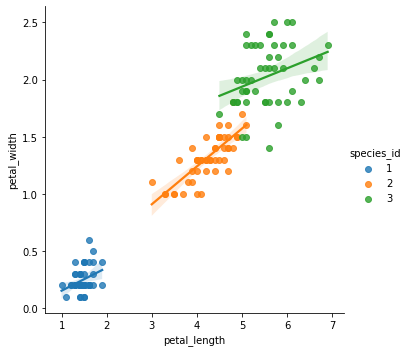

In [93]:
# Based on the pairplots, the best (of three possible) features to compare would be:

# petal_length and petal_width

sns.lmplot(x='petal_length', y='petal_width', data=iris, hue='species_id')
plt.show()

# There are still a few measurements that are mixed in between species 2 and 3, but overall the trend lines are quite clear as to which species returns a given measurement.

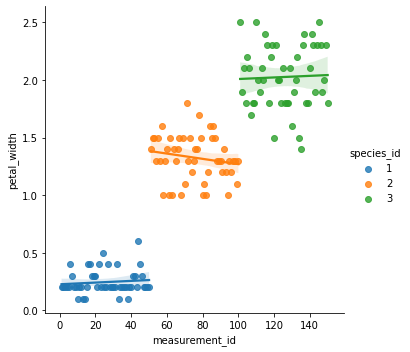

In [91]:
# This is of course, ignoring the combination of petal_width and measurement_id. 
# Perhaps not co, the measurements appear to have been all taken in order, starting from the smallest flowers first, and ending with the largest flowers.

sns.lmplot(x='measurement_id', y='petal_width', data=iris, hue='species_id')
plt.show()

### 1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. 

In [94]:
andata = sns.load_dataset('anscombe')

In [95]:
andata

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [96]:
andata.dtypes

dataset     object
x          float64
y          float64
dtype: object

In [100]:
# a. Use pandas to group the data by the dataset column, 
# b. and calculate summary statistics for each dataset. 


andata.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In [102]:
# c. What do you notice?

# count is the same for x and y. Hoping for more clarity when I graph the data.

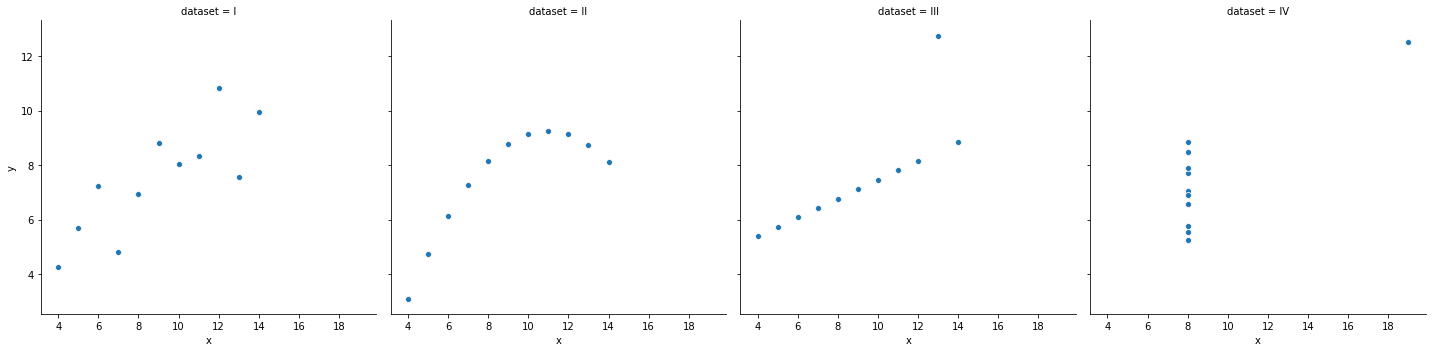

In [104]:
# Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

sns.relplot(x = 'x', y = 'y', col = 'dataset', data = andata)

# Interesting that dataset 3 & 4 have some outliers; I'd say they are insignificant enough to ignore.
# What is interesting is that those outliers also popped up in the max description when I ran the .describe() function.

### 2. Load the InsectSprays dataset and read it's documentation. 
- Create a boxplot that shows the effectiveness of the different insect sprays.

In [113]:
from pydataset import data

In [115]:
bugs = data('InsectSprays')

In [118]:
bugs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 1 to 72
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   count   72 non-null     int64 
 1   spray   72 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [119]:
data('InsectSprays', show_doc = True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [122]:
# Upon reading the docs, it appears that the test results are spraying each of the 6 pesticides into boxes.
# The lower the number of insects after the spraying is done, the better. 
# In summary, the lower the number in the count column, the better the spray worked for that measurement event (row).

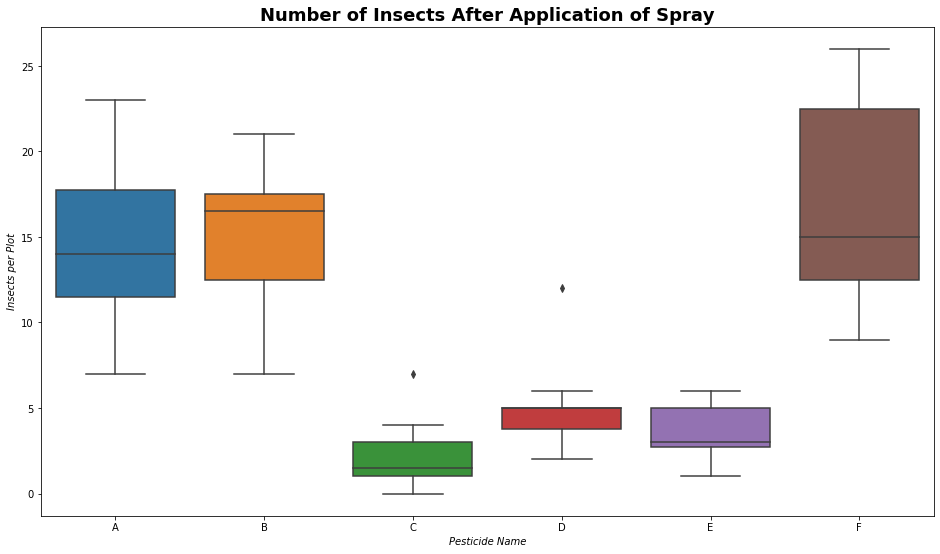

In [142]:
# Create a boxplot that shows the effectiveness of the different insect sprays.
plt.figure(figsize=(16,9))


sns.boxplot(data = bugs, x = 'spray', y = 'count')
plt.title("Number of Insects After Application of Spray", fontsize = 18, fontweight = 'bold')
plt.xlabel("Pesticide Name", style = 'italic')
plt.ylabel("Insects per Plot", style = 'italic')

plt.show()

### 3. Load the swiss dataset and read it's documentation. Create visualizations to answer the following questions

In [145]:
from pydataset import data

In [146]:
swiss = data('swiss')

In [147]:
swiss

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6
Glane,92.4,67.8,14,8,97.16,24.9
Gruyere,82.4,53.3,12,7,97.67,21.0
Sarine,82.9,45.2,16,13,91.38,24.4


In [149]:
data('swiss', show_doc = True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [ ]:
# Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic.

# (Choose a cutoff point for what constitutes catholic)

In [165]:
# Using .describe() as a means of finding the quartiles for the Catholic column. 
# Since the 50% quartile is only at 15%, which doesn't seem like a high %, I opted for 70% or > being a Catholic area.
swiss.describe()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


In [166]:
swiss['is_catholic'] = swiss.Catholic > 70
swiss

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False
Porrentruy,76.1,35.3,9,7,90.57,26.6,True
Broye,83.8,70.2,16,7,92.85,23.6,True
Glane,92.4,67.8,14,8,97.16,24.9,True
Gruyere,82.4,53.3,12,7,97.67,21.0,True
Sarine,82.9,45.2,16,13,91.38,24.4,True


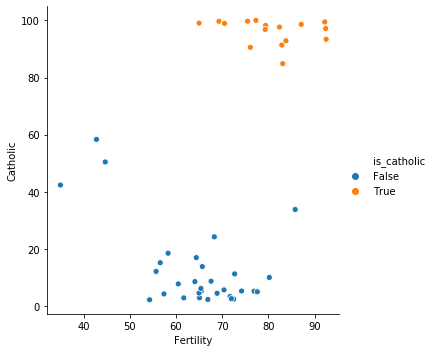

In [171]:
# Does whether or not a province is Catholic influence fertility?

sns.relplot(x = 'Fertility', y = 'Catholic', data = swiss, hue = 'is_catholic')
plt.show()

# It would appear that being a Catholic area would be positively correlated to the Fertility of the area.


Text(0.5, 1, 'Catholic and Fertility')

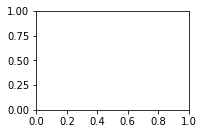

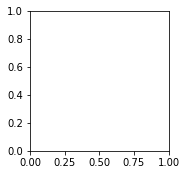

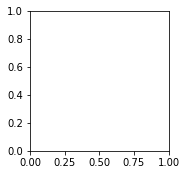

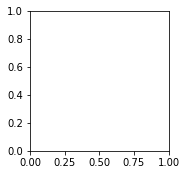

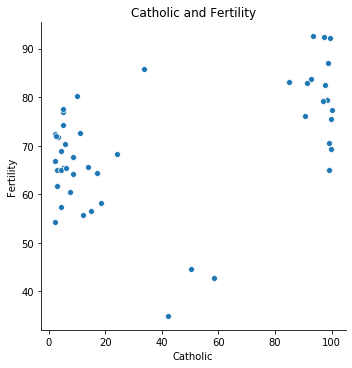

In [189]:
# What measure correlates most strongly with fertility?

plt.subplot(221)
sns.relplot(x = 'Agriculture', y = 'Fertility', data = swiss)
plt.title("Agriculture and Fertility")

plt.subplot(222)
sns.relplot(x = 'Education', y = 'Fertility', data = swiss)
plt.title("Education and Fertility")

plt.subplot(223)
sns.relplot(x = 'Infant.Mortality', y = 'Fertility', data = swiss)
plt.title("Infant Mortaility and Fertility")

plt.subplot(224)
sns.relplot(x = 'Catholic', y = 'Fertility', data = swiss)
plt.title("Catholic and Fertility")

# plt.subplots_adjust(hspace=0.4)

# Something isn't working with this subplot function... need to figure it out.

In [ ]:
# Use correlation matrix; swiss.corr()

In [ ]:
# Also use heatmap. 

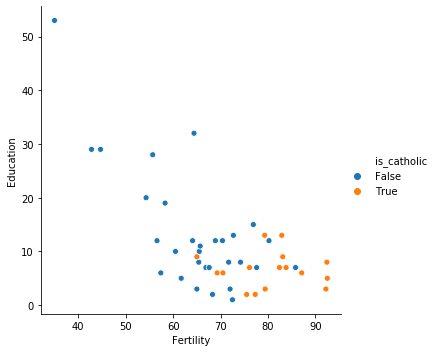

In [192]:
sns.relplot(x = 'Fertility', y = 'Education', data = swiss, hue = 'is_catholic')
plt.show()

### 4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [11]:
# Setting up dataframe for questions.

from env import host, user, password

def get_db_url(host, user, password, database):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}' 

In [12]:
c_login = get_db_url(host, user, password, 'chipotle')

In [13]:
c_df = pd.read_sql('SELECT * FROM orders', c_login)
c_df

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75


In [20]:
# Creating new column that is a float instead of an object data type
c_df['item_prices'] = c_df.item_price.str.replace("$","").astype('float')

In [22]:
c_df['item_revenue'] = (c_df.quantity) * (c_df.item_prices)

In [33]:
# Getting my bearings by looking at the adjustments to the dataframe.
c_df

,id,order_id,quantity,item_name,choice_description,item_price,item_prices,item_revenue
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39,2.39,2.39
1,2,1,1,Izze,[Clementine],$3.39,3.39,3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39,3.39,3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39,2.39,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98,16.98,33.96
...,...,...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75,11.75,11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75,11.75,11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25,11.25,11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75,8.75,8.75


In [34]:
# Creating the dataframe grouping by the item name and aggredating by the sum of all the sales of that item.
revenue_per_item = pd.DataFrame(c_df.groupby('item_name', as_index = False).item_revenue.agg('sum').sort_values(by = 'item_revenue', ascending = False)).head(4)
revenue_per_item

# The issue here is that I had to couldn't use item_name as my index, 
# since Seaborn needs that item_name column as a column in order to plot it on the x or y axis of a barchart.
# Now I can use this new dataframe as the data for a new bar chart using sns.barplot()

,item_name,item_revenue
17,Chicken Bowl,8044.63
18,Chicken Burrito,6387.06
39,Steak Burrito,4236.13
38,Steak Bowl,2479.81


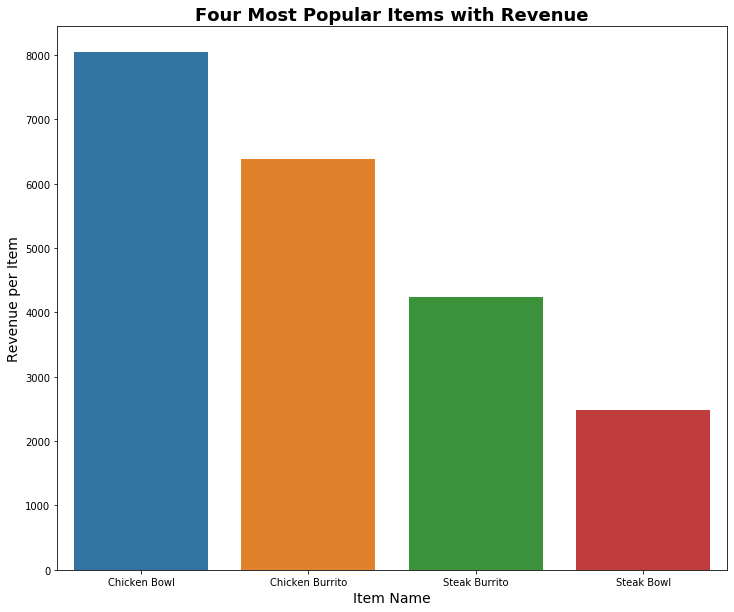

In [41]:
# Final chart answering the question:
# Create a bar chart that shows the 4 most popular items and the revenue produced by each.

plt.figure(figsize=(12, 10))

sns.barplot(x = 'item_name', y = 'item_revenue', data = revenue_per_item)
plt.title("Four Most Popular Items with Revenue", fontsize = 18, fontweight = 'bold')
plt.xlabel('Item Name', fontsize = 14)
plt.ylabel('Revenue per Item', fontsize = 14)


plt.show()

In [ ]:
# The issue is something to do with the index being the column I'm trying to call...

# I was right about the index being a problem, and this article confirmed that: 
# https://stackoverflow.com/questions/32908315/could-not-interpret-input-error-with-seaborn-when-plotting-groupbys/32908624

### 5. Load the sleepstudy data and read it's documentation.

- Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [ ]:
# Breaking down the problem:

# Create a line chart of all individuals reaction times
# Create a more prominant, average line showing the change in reaction time


In [42]:
from pydataset import data

In [185]:
sleep = data('sleepstudy')

In [186]:
sleep.shape

(180, 3)

In [187]:
sleep.describe()

,Reaction,Days,Subject
count,180.000000,180.000000,180.000000
mean,298.507892,4.500000,341.277778
std,56.328757,2.880293,20.320905
min,194.332200,0.000000,308.000000
25%,255.375825,2.000000,331.000000
50%,288.650800,4.500000,336.000000
75%,336.752075,7.000000,352.000000
max,466.353500,9.000000,372.000000


In [45]:
data('sleepstudy', show_doc = True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [44]:
sleep

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


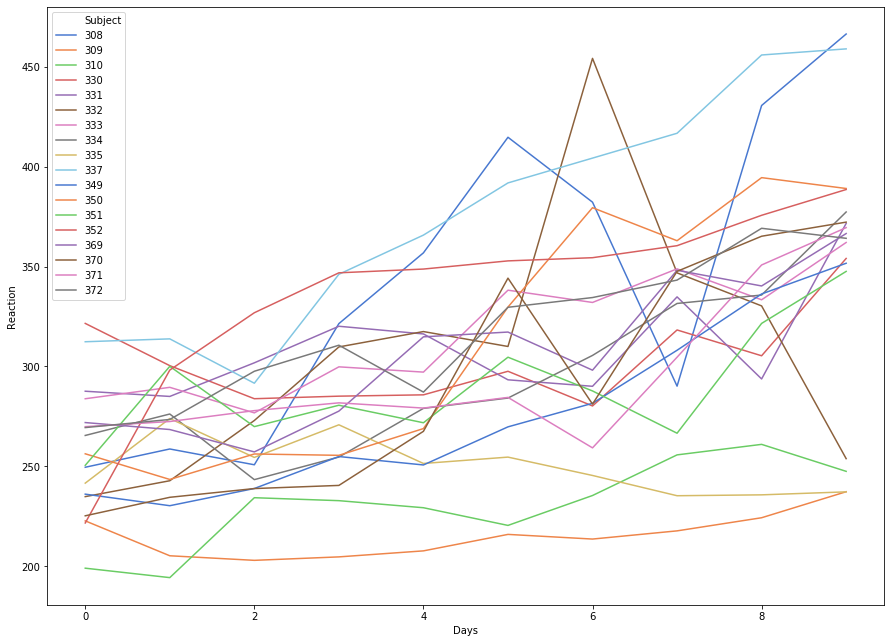

In [195]:
# Using the Subjects in hue (to add further dimensions to the chart).
# However, we still need an average of all those reactions.
plt.figure(figsize=(15, 11))
sns.lineplot(x = 'Days', y = 'Reaction', data = sleep, hue = 'Subject', palette = 'muted')
plt.show()

##### From the lineplot documentation:  
#### estimator : name of pandas method or callable or None, optional
- Method for aggregating across multiple observations of the y variable at the same x level. If None, all observations will be drawn.

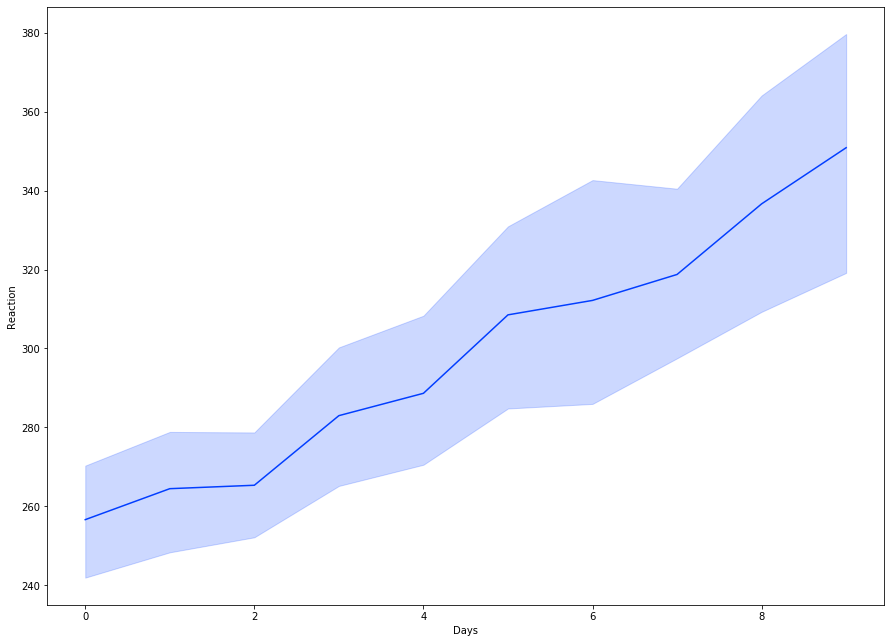

In [179]:
# Spent out a lot time trying to add an average column, which led to other issues because of missing data...

plt.figure(figsize=(15, 11))

sleep_avg = sns.lineplot(x = 'Days', y = 'Reaction', data = sleep)
plt.show()

# The estimator function will be default be set to aggregate the mean automatically

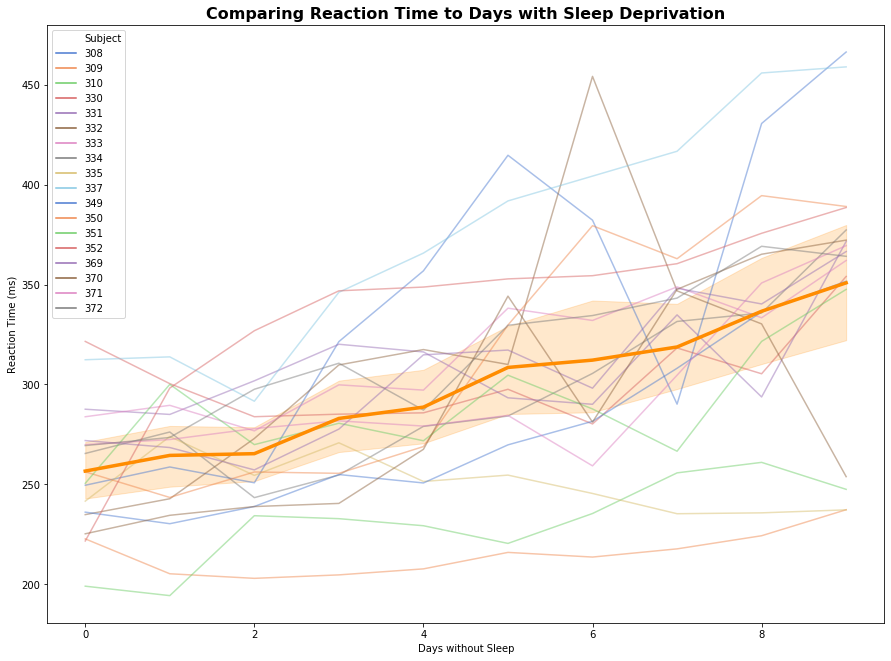

In [193]:
# Lastly, I muted the individual subject lines, and changed the width of the average line to emphesize it.

plt.figure(figsize=(15, 11))

sns.lineplot(x = 'Days', y = 'Reaction', data = sleep, hue = 'Subject', palette = 'muted', alpha = .47)
sleep_avg = sns.lineplot(x = 'Days', y = 'Reaction', data = sleep, linewidth = 3.5, color = 'darkorange')
plt.title("Comparing Reaction Time to Days with Sleep Deprivation", fontsize = 16, fontweight = 'bold')
plt.xlabel("Days without Sleep")
plt.ylabel("Reaction Time (ms)")
ax.legend(['Subject Reactions'])
plt.show()


# Exocortex source: https://python-graph-gallery.com/123-highlight-a-line-in-line-plot/

In [ ]:
# TIL: lineplot() uses mean as the default across all observations in the y axis 
# 

In [ ]:
# Room for improvement: perhaps define colors for individuals, some colors were similar, possibly hard to define
# Add Average to legend

# Suggestions from class/instructors: 
# 1. use ax.legend
# 2.
# 3.

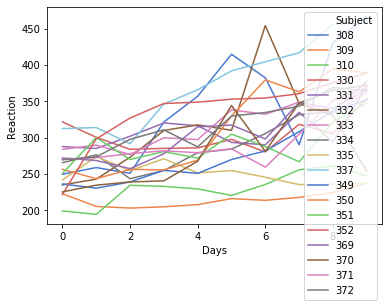

In [196]:
# I attempted to change the color pallete in use, but kept running into problems with the legend...
# Couldn't figure the legend binning out. 


sns.lineplot(x = 'Days', y = 'Reaction', data = sleep, hue = 'Subject', palette = 'muted')
plt.show()

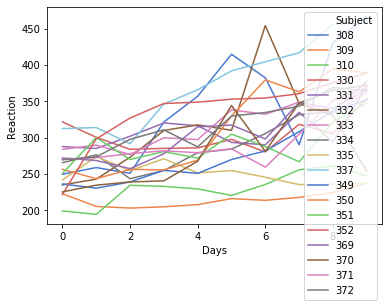

In [141]:
# I attempted to change the color pallete in use, but kept running into problems with the legend...
# Couldn't figure the legend binning out. 


sns.lineplot(x = 'Days', y = 'Reaction', data = sleep, hue = 'Subject', palette = 'muted')
plt.show()

In [ ]:
# Exocortex source: https://python-graph-gallery.com/123-highlight-a-line-in-line-plot/